In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [2]:
df = pd.read_csv('student_exam_data.csv')
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


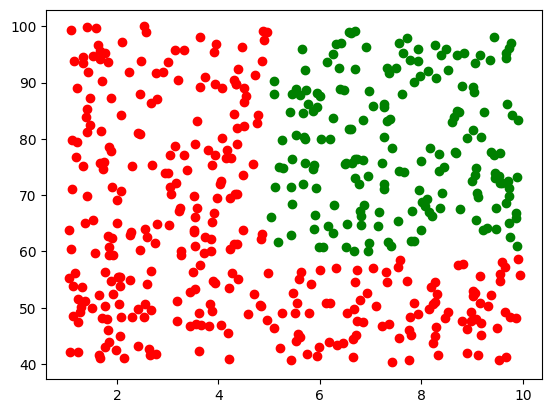

In [3]:
plt.scatter(df[df['Pass/Fail'] == 1]['Study Hours'], df[df['Pass/Fail'] == 1]['Previous Exam Score'], c='green', label='Pass')
plt.scatter(df[df['Pass/Fail'] == 0]['Study Hours'], df[df['Pass/Fail'] == 0]['Previous Exam Score'], c='red', label='Fail')
plt.show()

In [4]:
"""
Plan


1. create a neural network with 2 inputs, 1 hidden layer with 2 neurons with tanh, and 2 output neuron with softmax.
2. each time we will store weights and plot the points, plane in a 3d plot, there is no bias
3. we do backpogation and update weights by manual and also we will plot the points and plane in a 3d plot during each step while we transpose it
"""

'\nPlan\n\n\n1. create a neural network with 2 inputs, 1 hidden layer with 2 neurons with tanh, and 2 output neuron with softmax.\n2. each time we will store weights and plot the points, plane in a 3d plot, there is no bias\n3. we do backpogation and update weights by manual and also we will plot the points and plane in a 3d plot during each step while we transpose it\n'

C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 0, Loss: 0.8940


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 5, Loss: 0.8878


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 10, Loss: 0.8818


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 15, Loss: 0.8759


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 20, Loss: 0.8701


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 25, Loss: 0.8645


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 30, Loss: 0.8590


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 35, Loss: 0.8537


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 40, Loss: 0.8485


C:\Users\praga\AppData\Local\Temp\ipykernel_16476\3547485919.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Epoch 45, Loss: 0.8435
Training completed! All 8-plot visualizations saved in 'nn_plots' directory.


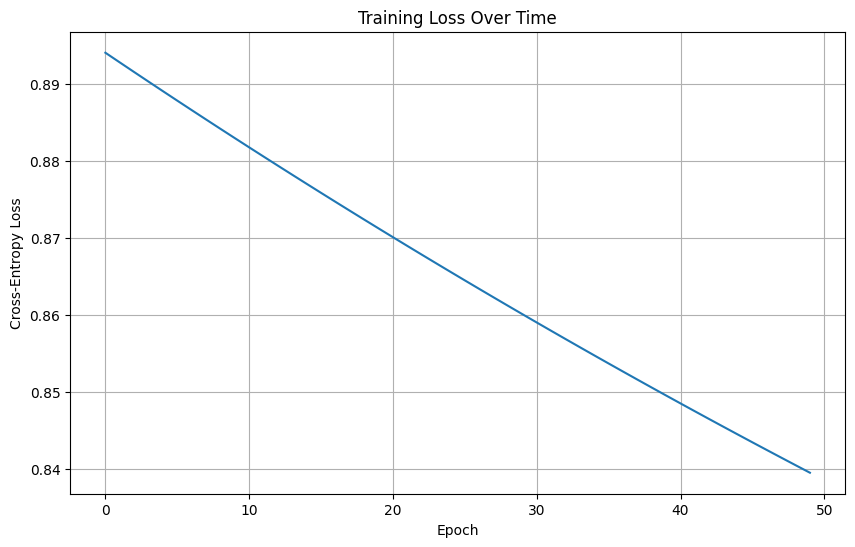

Final Training Accuracy: 36.80%

Final Weight Matrices:
W1 (Input → Hidden):
[[ 0.62567119 -0.27621272]
 [-0.35469639 -0.0122838 ]]

W2 (Hidden → Output):
[[-0.67602173  0.11632155]
 [-0.20124686  0.39902335]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

class CompleteNeuralNetworkVisualizer():
    def __init__(self):
        # Weight matrices
        self.W1 = np.random.randn(2, 2) * 0.5  # Input to Hidden: [w11 w12; w21 w22]
        self.W2 = np.random.randn(2, 2) * 0.5  # Hidden to Output: [w31 w32; w41 w42]
        self.lr = 0.01
        self.losses = []
        
        # Storage for visualization
        self.epoch_data = []
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, x):
        # Input to hidden: z1 = x · W1
        self.z1 = np.dot(x, self.W1)
        self.h = self.sigmoid(self.z1)
        
        # Hidden to output: z2 = h · W2  
        self.z2 = np.dot(self.h, self.W2)
        self.output = self.softmax(self.z2)
        
        return self.output
    
    def compute_loss(self, y, y_hat):
        m = y.shape[0]
        log_likelihood = -np.log(np.clip(y_hat[range(m), y], 1e-15, 1.0))
        loss = np.sum(log_likelihood) / m
        return loss
    
    def backward(self, x, y):
        m = y.shape[0]
        
        # Output layer gradients: ∂L/∂z2 = (output - y)
        delta_output = self.output.copy()
        delta_output[range(m), y] -= 1
        delta_output /= m
        
        # ∂L/∂W2 = h.T · ∂L/∂z2
        grad_W2 = np.dot(self.h.T, delta_output)
        
        # ∂L/∂h = ∂L/∂z2 · W2.T
        delta_hidden = np.dot(delta_output, self.W2.T) * self.sigmoid_derivative(self.h)
        
        # ∂L/∂W1 = x.T · ∂L/∂z1  
        delta_z1 = delta_hidden  # Since ∂L/∂z1 = ∂L/∂h * σ'(z1), but we already computed it
        grad_W1 = np.dot(x.T, delta_z1)
        
        # Store all data for visualization
        epoch_data = {
            'x': x.copy(),
            'y': y.copy(),  # Store labels for coloring
            'h': self.h.copy(), 
            'output': self.output.copy(),
            'W1': self.W1.copy(),
            'W2': self.W2.copy(),
            'delta_output': delta_output.copy(),
            'delta_hidden': delta_hidden.copy(),
            'grad_W1': grad_W1.copy(),
            'grad_W2': grad_W2.copy(),
            'h_transpose': self.h.T.copy(),
            'x_transpose': x.T.copy()
        }
        
        # Update weights
        self.W2 -= self.lr * grad_W2
        self.W1 -= self.lr * grad_W1
        
        return epoch_data
    
    def train(self, x, y, epochs=200, plot_every=1, save_dir='nn_plots'):
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(x)
            loss = self.compute_loss(y, output)
            self.losses.append(loss)
            
            # Backward pass
            epoch_data = self.backward(x, y)
            epoch_data['epoch'] = epoch
            epoch_data['loss'] = loss
            
            if epoch % plot_every == 0:
                self.create_complete_visualization(epoch_data, save_dir)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
    
    def create_complete_visualization(self, data, save_dir):
        """Create 8 plots: 4 forward + 4 backward"""
        fig = plt.figure(figsize=(24, 12))
        
        # FORWARD PASS PLOTS (Top Row)
        ax1 = fig.add_subplot(2, 4, 1, projection='3d')
        self.plot_h1_plane(ax1, data)
        
        ax2 = fig.add_subplot(2, 4, 2, projection='3d') 
        self.plot_h2_plane(ax2, data)
        
        ax3 = fig.add_subplot(2, 4, 3, projection='3d')
        self.plot_o1_plane(ax3, data)
        
        ax4 = fig.add_subplot(2, 4, 4, projection='3d')
        self.plot_o2_plane(ax4, data)
        
        # BACKWARD PASS PLOTS (Bottom Row)
        ax5 = fig.add_subplot(2, 4, 5, projection='3d')
        self.plot_transpose_visualization_W2(ax5, data)
        
        ax6 = fig.add_subplot(2, 4, 6, projection='3d')
        self.plot_transpose_effect_hidden(ax6, data)
        
        ax7 = fig.add_subplot(2, 4, 7, projection='3d') 
        self.plot_transpose_visualization_W1(ax7, data)
        
        ax8 = fig.add_subplot(2, 4, 8, projection='3d')
        self.plot_gradient_flow_comparison(ax8, data)
        
        plt.suptitle(f'Epoch {data["epoch"]}: Forward & Backward Pass Visualization\nLoss: {data["loss"]:.4f}', 
                     fontsize=16, y=0.95)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        
        # Save plot
        plt.savefig(f'{save_dir}/epoch_{data["epoch"]:04d}.png', dpi=100, bbox_inches='tight')
        plt.close(fig)
    
    def get_class_colors(self, y):
        """Get colors for data points based on class labels"""
        return ['red' if label == 0 else 'blue' for label in y]
    
    # FORWARD PASS VISUALIZATIONS
    def plot_h1_plane(self, ax, data):
        """Plot h1 = w11*x1 + w21*x2 plane with same data points colored by class"""
        x = data['x']
        y = data['y']
        W1 = data['W1']
        
        # Create input space grid
        x1_range = np.linspace(x[:, 0].min()-0.5, x[:, 0].max()+0.5, 20)
        x2_range = np.linspace(x[:, 1].min()-0.5, x[:, 1].max()+0.5, 20)
        X1, X2 = np.meshgrid(x1_range, x2_range)
        
        # h1 = w11*x1 + w21*x2 (first column of W1)
        H1 = W1[0, 0] * X1 + W1[1, 0] * X2
        
        # Plot plane
        ax.plot_surface(X1, X2, H1, alpha=0.4, cmap='viridis')
        
        # Plot SAME data points with class colors
        h1_values = W1[0, 0] * x[:, 0] + W1[1, 0] * x[:, 1]
        colors = self.get_class_colors(y)
        ax.scatter(x[:, 0], x[:, 1], h1_values, c=colors, s=50, alpha=0.8)
        
        ax.set_title(f'Forward: h1 = {W1[0,0]:.2f}*x1 + {W1[1,0]:.2f}*x2', fontsize=12)
        ax.set_xlabel('x1 (Study Hours)')
        ax.set_ylabel('x2 (Previous Score)') 
        ax.set_zlabel('h1')
    
    def plot_h2_plane(self, ax, data):
        """Plot h2 = w12*x1 + w22*x2 plane with same data points colored by class"""
        x = data['x']
        y = data['y']
        W1 = data['W1']
        
        # Create input space grid
        x1_range = np.linspace(x[:, 0].min()-0.5, x[:, 0].max()+0.5, 20)
        x2_range = np.linspace(x[:, 1].min()-0.5, x[:, 1].max()+0.5, 20)
        X1, X2 = np.meshgrid(x1_range, x2_range)
        
        # h2 = w12*x1 + w22*x2 (second column of W1)
        H2 = W1[0, 1] * X1 + W1[1, 1] * X2
        
        # Plot plane
        ax.plot_surface(X1, X2, H2, alpha=0.4, cmap='plasma')
        
        # Plot SAME data points with class colors
        h2_values = W1[0, 1] * x[:, 0] + W1[1, 1] * x[:, 1]
        colors = self.get_class_colors(y)
        ax.scatter(x[:, 0], x[:, 1], h2_values, c=colors, s=50, alpha=0.8)
        
        ax.set_title(f'Forward: h2 = {W1[0,1]:.2f}*x1 + {W1[1,1]:.2f}*x2', fontsize=12)
        ax.set_xlabel('x1 (Study Hours)')
        ax.set_ylabel('x2 (Previous Score)')
        ax.set_zlabel('h2')
    
    def plot_o1_plane(self, ax, data):
        """Plot o1 = w31*h1 + w41*h2 plane with same data points colored by class"""
        x = data['x']
        y = data['y']
        h = data['h']
        W2 = data['W2']
        
        # Create hidden space grid
        h1_range = np.linspace(h[:, 0].min()-0.1, h[:, 0].max()+0.1, 20)
        h2_range = np.linspace(h[:, 1].min()-0.1, h[:, 1].max()+0.1, 20)
        H1, H2 = np.meshgrid(h1_range, h2_range)
        
        # o1 = w31*h1 + w41*h2 (first column of W2)
        O1 = W2[0, 0] * H1 + W2[1, 0] * H2
        
        # Plot plane
        ax.plot_surface(H1, H2, O1, alpha=0.4, cmap='coolwarm')
        
        # Plot SAME data points (transformed to hidden space) with class colors
        o1_values = W2[0, 0] * h[:, 0] + W2[1, 0] * h[:, 1]
        colors = self.get_class_colors(y)
        ax.scatter(h[:, 0], h[:, 1], o1_values, c=colors, s=50, alpha=0.8)
        
        ax.set_title(f'Forward: o1 = {W2[0,0]:.2f}*h1 + {W2[1,0]:.2f}*h2', fontsize=12)
        ax.set_xlabel('h1')
        ax.set_ylabel('h2')
        ax.set_zlabel('o1')
    
    def plot_o2_plane(self, ax, data):
        """Plot o2 = w32*h1 + w42*h2 plane with same data points colored by class"""
        x = data['x']
        y = data['y']
        h = data['h']
        W2 = data['W2']
        
        # Create hidden space grid
        h1_range = np.linspace(h[:, 0].min()-0.1, h[:, 0].max()+0.1, 20)
        h2_range = np.linspace(h[:, 1].min()-0.1, h[:, 1].max()+0.1, 20)
        H1, H2 = np.meshgrid(h1_range, h2_range)
        
        # o2 = w32*h1 + w42*h2 (second column of W2)
        O2 = W2[0, 1] * H1 + W2[1, 1] * H2
        
        # Plot plane
        ax.plot_surface(H1, H2, O2, alpha=0.4, cmap='inferno')
        
        # Plot SAME data points (transformed to hidden space) with class colors
        o2_values = W2[0, 1] * h[:, 0] + W2[1, 1] * h[:, 1]
        colors = self.get_class_colors(y)
        ax.scatter(h[:, 0], h[:, 1], o2_values, c=colors, s=50, alpha=0.8)
        
        ax.set_title(f'Forward: o2 = {W2[0,1]:.2f}*h1 + {W2[1,1]:.2f}*h2', fontsize=12)
        ax.set_xlabel('h1')
        ax.set_ylabel('h2')
        ax.set_zlabel('o2')
    
    # BACKWARD PASS VISUALIZATIONS - SHOWING WHY TRANSPOSE IS NEEDED
    def plot_transpose_visualization_W2(self, ax, data):
        """Visualize WHY we need h.T in ∂L/∂W2 = h.T · ∂L/∂z2"""
        h = data['h']
        y = data['y']
        h_T = data['h_transpose']
        grad_W2 = data['grad_W2']
        
        # Show original h points
        colors = self.get_class_colors(y)
        ax.scatter(h[:, 0], h[:, 1], [0]*len(h), c=colors, s=30, alpha=0.5, label='h (original)')
        
        # Show transposed effect: h.T means we're looking at samples across hidden units
        # Plot the transpose effect by showing how each hidden unit contributes
        for i in range(len(h)):
            # Original position in hidden space
            ax.plot([h[i, 0], h[i, 1]], [h[i, 1], h[i, 0]], [0, 0], 
                   color=colors[i], alpha=0.3, linestyle='--')
        
        # Show the resulting gradient surface
        x_pos = np.array([0, 1])  # h1, h2 
        y_pos = np.array([0, 1])  # o1, o2
        X, Y = np.meshgrid(x_pos, y_pos)
        
        # Plot gradient surface
        ax.plot_surface(X, Y, grad_W2.T, alpha=0.7, cmap='RdBu')
        
        # Add gradient value points
        for i in range(2):
            for j in range(2):
                ax.scatter(i, j, grad_W2[i, j], c='black', s=100, marker='X')
                ax.text(i, j, grad_W2[i, j] + 0.05, f'{grad_W2[i, j]:.3f}', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
        
        ax.set_title('Backward: Why h.T? ∂L/∂W2 = h.T · ∂L/∂z2', fontsize=12)
        ax.set_xlabel('Hidden Units (h1, h2)')
        ax.set_ylabel('Output Units (o1, o2)')
        ax.set_zlabel('Gradient Value')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['h1', 'h2'])
        ax.set_yticklabels(['o1', 'o2'])
        ax.legend()
    
    def plot_transpose_effect_hidden(self, ax, data):
        """Show WHY we need W2.T in ∂L/∂h = ∂L/∂z2 · W2.T"""
        h = data['h']
        y = data['y']
        delta_hidden = data['delta_hidden']
        W2 = data['W2']
        
        colors = self.get_class_colors(y)
        
        # Show original hidden space points
        ax.scatter(h[:, 0], h[:, 1], [0]*len(h), c=colors, s=50, alpha=0.5, label='h (forward)')
        
        # Show gradient flow - points elevated by their gradient values
        ax.scatter(h[:, 0], h[:, 1], delta_hidden[:, 0], c=colors, s=50, alpha=0.8, 
                  marker='^', label='∂L/∂h1')
        ax.scatter(h[:, 0], h[:, 1], delta_hidden[:, 1], c=colors, s=50, alpha=0.8, 
                  marker='v', label='∂L/∂h2')
        
        # Show why transpose is needed: gradient flows in reverse direction
        # Create arrows showing gradient flow from output to hidden
        for i in range(min(10, len(h))):  # Show only first 10 for clarity
            # Arrow from hidden activation to gradient
            ax.quiver(h[i, 0], h[i, 1], 0, 
                     0, 0, delta_hidden[i, 0], 
                     color='red', alpha=0.6, arrow_length_ratio=0.1)
        
        # Show W2.T effect by plotting the transpose transformation plane
        h1_range = np.linspace(h[:, 0].min()-0.1, h[:, 0].max()+0.1, 15)
        h2_range = np.linspace(h[:, 1].min()-0.1, h[:, 1].max()+0.1, 15)
        H1, H2 = np.meshgrid(h1_range, h2_range)
        
        # The transpose W2.T creates the inverse transformation
        Z = W2.T[0, 0] * H1 + W2.T[0, 1] * H2
        ax.plot_surface(H1, H2, Z, alpha=0.2, cmap='Blues')
        
        ax.set_title('Backward: Why W2.T? ∂L/∂h = ∂L/∂z2 · W2.T', fontsize=12)
        ax.set_xlabel('h1')
        ax.set_ylabel('h2')
        ax.set_zlabel('∂L/∂h')
        ax.legend()
    
    def plot_transpose_visualization_W1(self, ax, data):
        """Visualize WHY we need x.T in ∂L/∂W1 = x.T · ∂L/∂z1"""
        x = data['x']
        y = data['y']
        x_T = data['x_transpose']
        grad_W1 = data['grad_W1']
        
        colors = self.get_class_colors(y)
        
        # Show original input space points
        ax.scatter(x[:, 0], x[:, 1], [0]*len(x), c=colors, s=30, alpha=0.5, label='x (original)')
        
        # Show the resulting gradient surface
        x_pos = np.array([0, 1])  # x1, x2
        y_pos = np.array([0, 1])  # h1, h2
        X, Y = np.meshgrid(x_pos, y_pos)
        
        # Plot gradient surface
        ax.plot_surface(X, Y, grad_W1.T, alpha=0.7, cmap='RdBu')
        
        # Add gradient value points
        for i in range(2):
            for j in range(2):
                ax.scatter(i, j, grad_W1[i, j], c='black', s=100, marker='X')
                ax.text(i, j, grad_W1[i, j] + 0.05, f'{grad_W1[i, j]:.3f}', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
        
        # Show transpose effect with arrows
        for i in range(min(5, len(x))):  # Show only first 5 for clarity
            ax.plot([x[i, 0]/5, x[i, 1]/5], [x[i, 1]/5, x[i, 0]/5], [0.1, 0.1], 
                   color=colors[i], alpha=0.5, linestyle=':', linewidth=2)
        
        ax.set_title('Backward: Why x.T? ∂L/∂W1 = x.T · ∂L/∂z1', fontsize=12)
        ax.set_xlabel('Input Features (x1, x2)')
        ax.set_ylabel('Hidden Units (h1, h2)')
        ax.set_zlabel('Gradient Value')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['x1', 'x2'])
        ax.set_yticklabels(['h1', 'h2'])
        ax.legend()
    
    def plot_gradient_flow_comparison(self, ax, data):
        """Compare forward flow vs backward flow to show transpose necessity"""
        x = data['x']
        h = data['h']
        y = data['y']
        delta_output = data['delta_output']
        delta_hidden = data['delta_hidden']
        
        colors = self.get_class_colors(y)
        
        # Average across samples for cleaner visualization
        avg_delta_out = np.mean(delta_output, axis=0)
        avg_delta_hid = np.mean(delta_hidden, axis=0)
        avg_x = np.mean(x, axis=0)
        avg_h = np.mean(h, axis=0)
        
        # Forward flow: x → h → o
        ax.scatter([0, 0], [0, 1], [avg_x[0], avg_x[1]], c='green', s=200, alpha=0.7, 
                  marker='o', label='Input (x1, x2)')
        ax.scatter([1, 1], [0, 1], [avg_h[0], avg_h[1]], c='orange', s=200, alpha=0.7, 
                  marker='s', label='Hidden (h1, h2)')
        
        # Backward flow: ∂L/∂o → ∂L/∂h → ∂L/∂x (gradients)
        ax.scatter([2, 2], [0, 1], [avg_delta_out[0], avg_delta_out[1]], c='red', s=200, alpha=0.7, 
                  marker='^', label='∂L/∂output')
        ax.scatter([3, 3], [0, 1], [avg_delta_hid[0], avg_delta_hid[1]], c='blue', s=200, alpha=0.7, 
                  marker='v', label='∂L/∂hidden')
        
        # Show forward arrows
        ax.quiver([0, 0], [0, 1], [avg_x[0], avg_x[1]], 
                 [1, 1], [0, 1], [avg_h[0]-avg_x[0], avg_h[1]-avg_x[1]], 
                 color='green', alpha=0.6, arrow_length_ratio=0.1, linewidth=3)
        
        # Show backward arrows (transpose effect)
        ax.quiver([2, 2], [0, 1], [avg_delta_out[0], avg_delta_out[1]], 
                 [3, 3], [0, 1], [avg_delta_hid[0]-avg_delta_out[0], avg_delta_hid[1]-avg_delta_out[1]], 
                 color='red', alpha=0.6, arrow_length_ratio=0.1, linewidth=3, linestyle='--')
        
        ax.set_title('Forward vs Backward: Why Transpose?', fontsize=12)
        ax.set_xlabel('Network Flow')
        ax.set_ylabel('Unit Index')
        ax.set_zlabel('Activation/Gradient Value')
        ax.set_xticks([0, 1, 2, 3])
        ax.set_xticklabels(['Input', 'Hidden', '∂L/∂Out', '∂L/∂Hid'])
        ax.legend()


# Load your data
df = pd.read_csv('student_exam_data.csv')

# Prepare data
X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Train model with complete visualization
model = CompleteNeuralNetworkVisualizer()
model.train(X_normalized, y, epochs=50, plot_every=5)

print("Training completed! All 8-plot visualizations saved in 'nn_plots' directory.")

# Plot final loss curve
plt.figure(figsize=(10, 6))
plt.plot(model.losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.show()

# Final accuracy
predictions = model.forward(X_normalized)
predicted_classes = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_classes == y)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")

print("\nFinal Weight Matrices:")
print("W1 (Input → Hidden):")
print(model.W1)
print("\nW2 (Hidden → Output):")  
print(model.W2)